# Assignment 5 - Logistic Regression

Requirements:

- Use`LogisticRegression`to classify whether the card is approved or not.
- Preprocess data if needed and split data into train and test sets.
- Plot confusion matrix and report F1 score of your model

Data Description: https://www.kaggle.com/datasets/rohitudageri/credit-card-details

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.preprocessing import LabelEncoder

### Loading Data

In [12]:
#df1 = pd.read_csv('/content/drive/MyDrive/NSU-ML-Data/Credit_card.csv')
df1 = pd.read_csv('Credit_card.csv')

In [13]:
print(df1.shape)
df1.head()

(1548, 18)


,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2


In [14]:
# target = pd.read_csv('/content/drive/MyDrive/NSU-ML-Data/Credit_card_label.csv')
target = pd.read_csv('Credit_card_label.csv')
print(target.shape)
target.head()

(1548, 2)


,Ind_ID,label
0,5008827,1
1,5009744,1
2,5009746,1
3,5009749,1
4,5009752,1


In [15]:
df = pd.merge(df1, target, left_index=True, right_index=True, suffixes=('', '_y'))

In [16]:
df.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,Ind_ID_y,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,5008827,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,5009744,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,5009746,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,5009749,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,5009752,1


### Exploratory Data Analysis

In [17]:
df.shape

(1548, 20)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548 entries, 0 to 1547
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   GENDER           1541 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Propert_Owner    1548 non-null   object 
 4   CHILDREN         1548 non-null   int64  
 5   Annual_income    1525 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   EDUCATION        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Birthday_count   1526 non-null   float64
 11  Employed_days    1548 non-null   int64  
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  EMAIL_ID         1548 non-null   int64  
 16  Type_Occupation  1060 non-null   object 
 17  Family_Members

In [19]:
df.drop("Ind_ID_y", axis=1, inplace=True)

In [20]:
df.isna().sum()

Ind_ID               0
GENDER               7
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income       23
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Birthday_count      22
Employed_days        0
Mobile_phone         0
Work_Phone           0
Phone                0
EMAIL_ID             0
Type_Occupation    488
Family_Members       0
label                0
dtype: int64

In [21]:
df.describe()

,Ind_ID,CHILDREN,Annual_income,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Family_Members,label
count,1.548000e+03,1548.000000,1.525000e+03,1526.000000,1548.000000,1548.0,1548.000000,1548.000000,1548.000000,1548.000000,1548.000000
mean,5.078920e+06,0.412791,1.913993e+05,-16040.342071,59364.689922,1.0,0.208010,0.309432,0.092377,2.161499,0.113049
std,4.171759e+04,0.776691,1.132530e+05,4229.503202,137808.062701,0.0,0.406015,0.462409,0.289651,0.947772,0.316755
min,5.008827e+06,0.000000,3.375000e+04,-24946.000000,-14887.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
25%,5.045070e+06,0.000000,1.215000e+05,-19553.000000,-3174.500000,1.0,0.000000,0.000000,0.000000,2.000000,0.000000
50%,5.078842e+06,0.000000,1.665000e+05,-15661.500000,-1565.000000,1.0,0.000000,0.000000,0.000000,2.000000,0.000000
75%,5.115673e+06,1.000000,2.250000e+05,-12417.000000,-431.750000,1.0,0.000000,1.000000,0.000000,3.000000,0.000000
max,5.150412e+06,14.000000,1.575000e+06,-7705.000000,365243.000000,1.0,1.000000,1.000000,1.000000,15.000000,1.000000


<Axes: xlabel='Annual_income', ylabel='Count'>

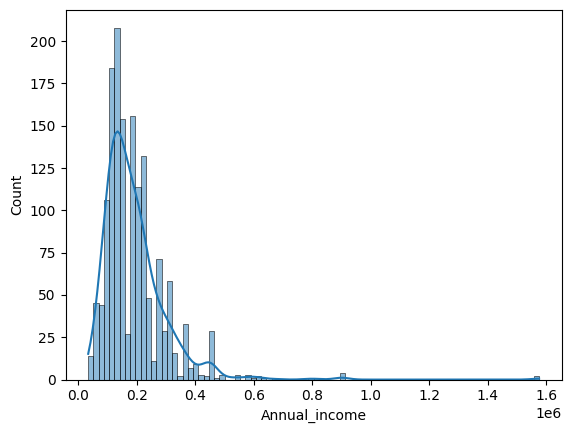

In [22]:
sns.histplot(df["Annual_income"], kde=True)

In [23]:
df["Annual_income"].isna().sum()

23

In [24]:
df["Marital_status"].unique()

array(['Married', 'Single / not married', 'Civil marriage', 'Separated',
       'Widow'], dtype=object)

In [25]:
df["Marital_status"].value_counts()

Marital_status
Married                 1049
Single / not married     227
Civil marriage           101
Separated                 96
Widow                     75
Name: count, dtype: int64

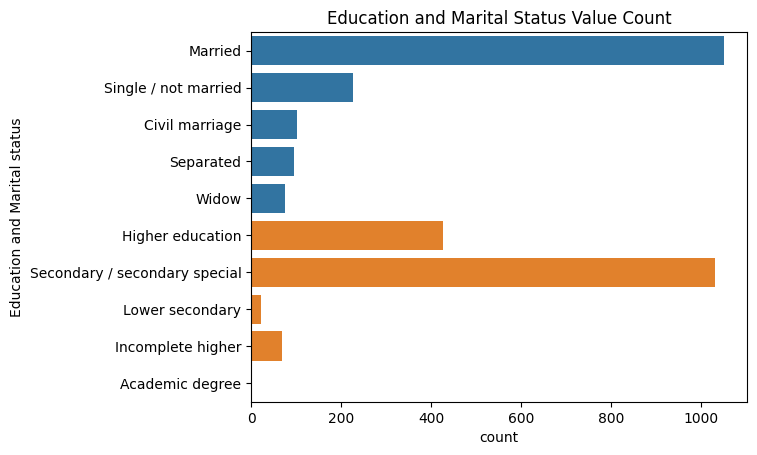

In [26]:
sns.countplot(df["Marital_status"])
sns.countplot(df["EDUCATION"])
plt.ylabel("Education and Marital status")
plt.title("Education and Marital Status Value Count")
plt.show()

<Axes: xlabel='count', ylabel='Type_Occupation'>

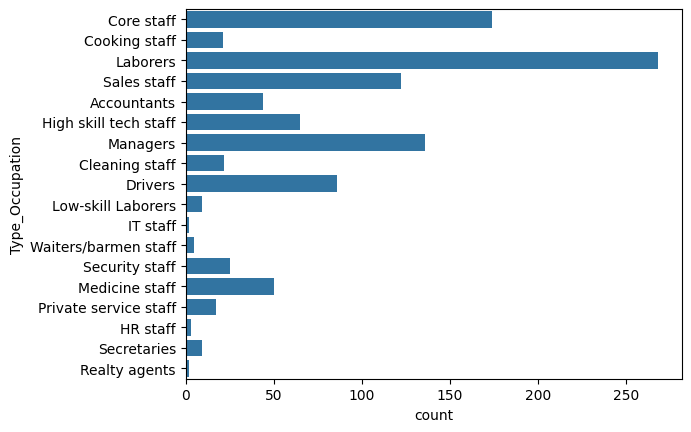

In [27]:
sns.countplot(df["Type_Occupation"])

In [28]:
df.Family_Members.value_counts(ascending=True)

Family_Members
6       1
15      1
5      15
4     127
3     268
1     334
2     802
Name: count, dtype: int64

In [29]:
df.columns

Index(['Ind_ID', 'GENDER', 'Car_Owner', 'Propert_Owner', 'CHILDREN',
       'Annual_income', 'Type_Income', 'EDUCATION', 'Marital_status',
       'Housing_type', 'Birthday_count', 'Employed_days', 'Mobile_phone',
       'Work_Phone', 'Phone', 'EMAIL_ID', 'Type_Occupation', 'Family_Members',
       'label'],
      dtype='object')

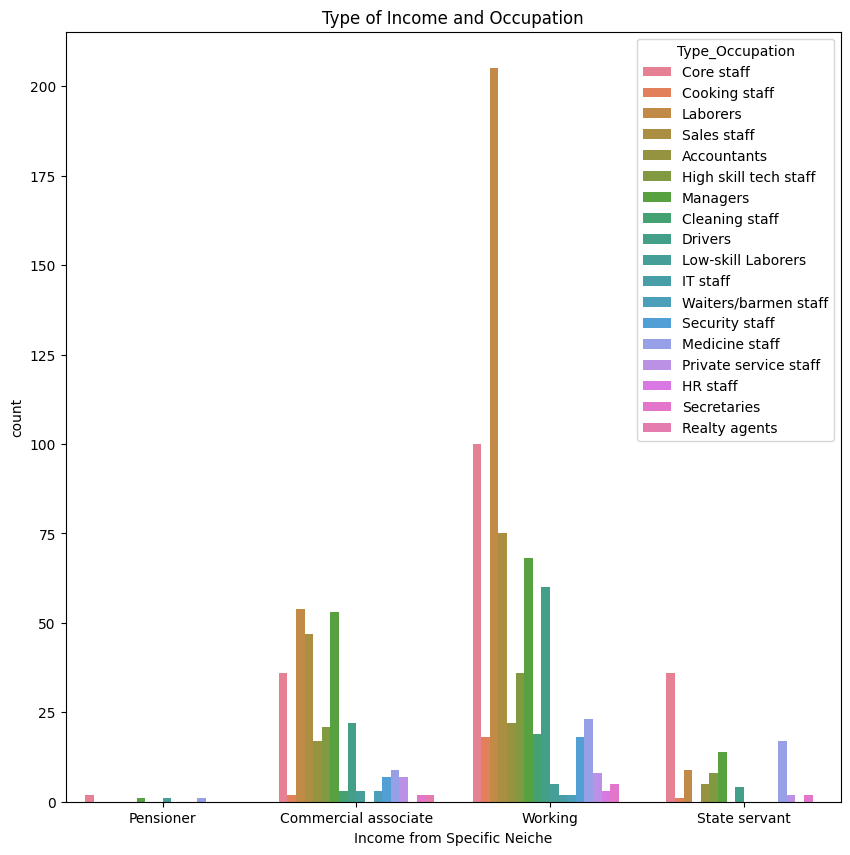

In [30]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.countplot(data=df, x="Type_Income", hue="Type_Occupation", dodge=True, ax=ax)
plt.xlabel("Income from Specific Neiche")
plt.title("Type of Income and Occupation")
plt.show()

<Axes: >

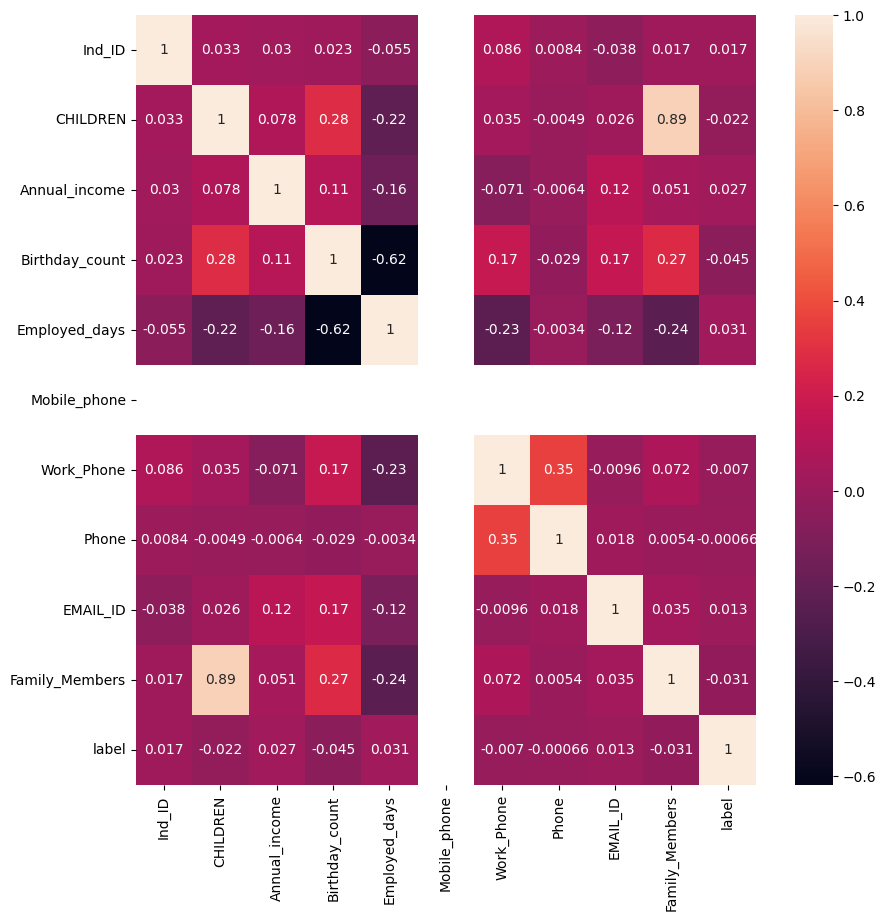

In [31]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True, ax=ax)

In [32]:
df.isna().sum()

Ind_ID               0
GENDER               7
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income       23
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Birthday_count      22
Employed_days        0
Mobile_phone         0
Work_Phone           0
Phone                0
EMAIL_ID             0
Type_Occupation    488
Family_Members       0
label                0
dtype: int64

#### Data Preprocessing

In [33]:
df["Type_Occupation"].fillna(df["Type_Occupation"].mode()[0], inplace=True)
df["Annual_income"].fillna(df["Annual_income"].mean(), inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_9020\733426738.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Type_Occupation"].fillna(df["Type_Occupation"].mode()[0], inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_9020\733426738.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behave

In [34]:
df.isna().sum()

Ind_ID              0
GENDER              7
Car_Owner           0
Propert_Owner       0
CHILDREN            0
Annual_income       0
Type_Income         0
EDUCATION           0
Marital_status      0
Housing_type        0
Birthday_count     22
Employed_days       0
Mobile_phone        0
Work_Phone          0
Phone               0
EMAIL_ID            0
Type_Occupation     0
Family_Members      0
label               0
dtype: int64

In [35]:
df.dropna(inplace=True)

In [36]:
df.isna().sum()

Ind_ID             0
GENDER             0
Car_Owner          0
Propert_Owner      0
CHILDREN           0
Annual_income      0
Type_Income        0
EDUCATION          0
Marital_status     0
Housing_type       0
Birthday_count     0
Employed_days      0
Mobile_phone       0
Work_Phone         0
Phone              0
EMAIL_ID           0
Type_Occupation    0
Family_Members     0
label              0
dtype: int64

In [38]:
encoder = LabelEncoder()
object_col = df.select_dtypes(exclude=['int', 'float']).columns
for col in object_col:
    df[col] = encoder.fit_transform(df[col])

In [39]:
df.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,1,1,1,0,180000.00000,1,1,1,1,-18772.0,365243,1,0,0,0,8,2,1
1,5009744,0,1,0,0,315000.00000,0,1,1,1,-13557.0,-586,1,1,1,0,8,2,1
3,5009749,0,1,0,0,191399.32623,0,1,1,1,-13557.0,-586,1,1,1,0,8,2,1
4,5009752,0,1,0,0,315000.00000,0,1,1,1,-13557.0,-586,1,1,1,0,8,2,1
6,5009754,0,1,0,0,315000.00000,0,1,1,1,-13557.0,-586,1,1,1,0,8,2,1


In [40]:
X = df.drop(["Ind_ID", "label"], axis=1)
y = df["label"]

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

In [51]:
model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)


c:\Users\DELL\miniforge3\envs\ai_search_engine\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=500)

In [52]:
y_pred = model.predict(X_test)

In [57]:
print(f"F1 Score =  {f1_score(y_test, y_pred)}")

F1 Score =  0.0


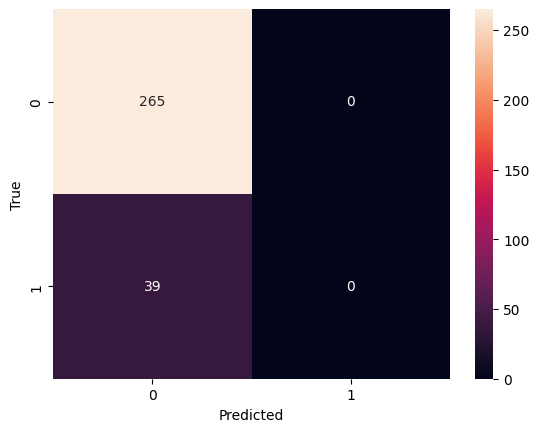

In [55]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()